In [73]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from skimage.morphology import opening, square
from skimage.morphology import remove_small_objects
from scipy import ndimage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load predictions
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/predictions1.pkl', 'rb') as f:
    predictions = pickle.load(f)
# Load preprocessed images
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/preprocessed_images.pkl', 'rb') as f:
    preprocessed_images = pickle.load(f)

# Load binary masks
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/masks.pkl', 'rb') as f:
    masks = pickle.load(f)

In [9]:
# Get your image ids
image_ids = list(preprocessed_images.keys())

In [10]:
# Extract just the blood vessels masks from the masks dictionary
masks_blood_vessels = {id_: masks[id_]['blood_vessel'] for id_ in image_ids}

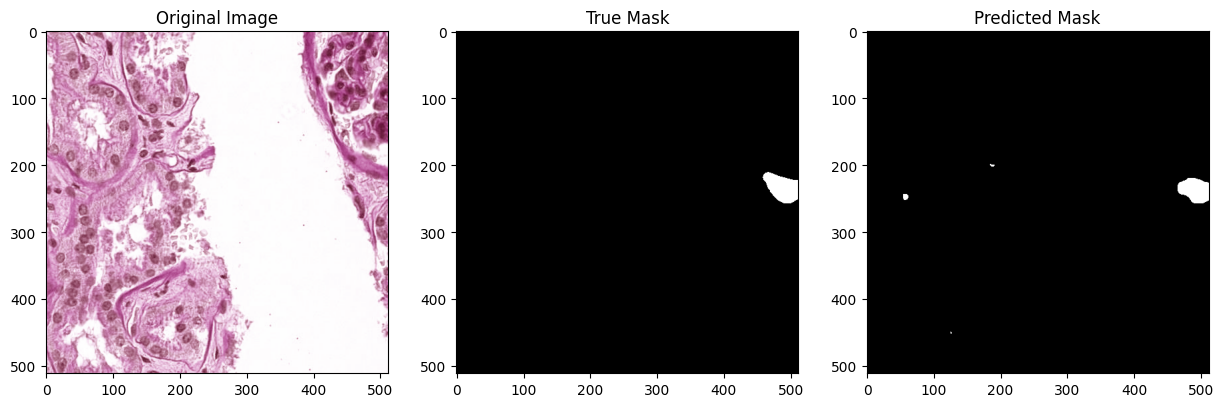

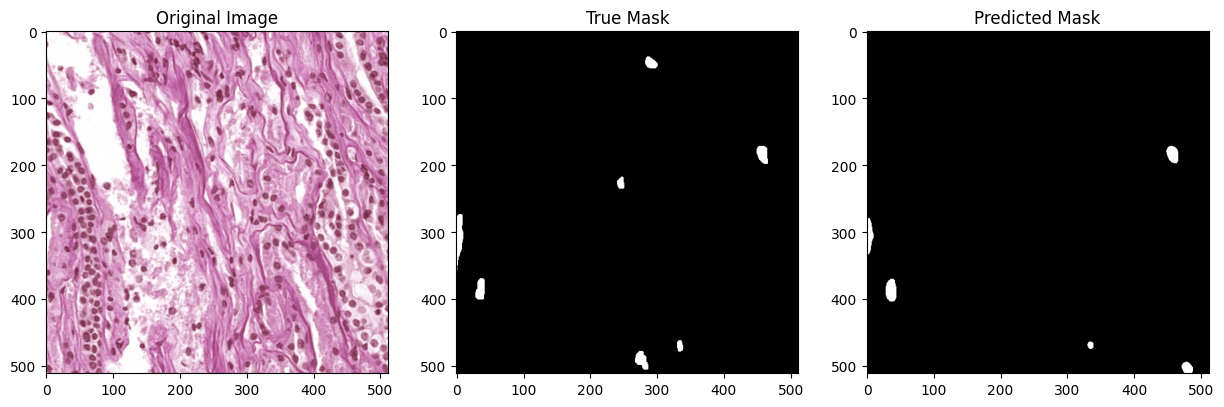

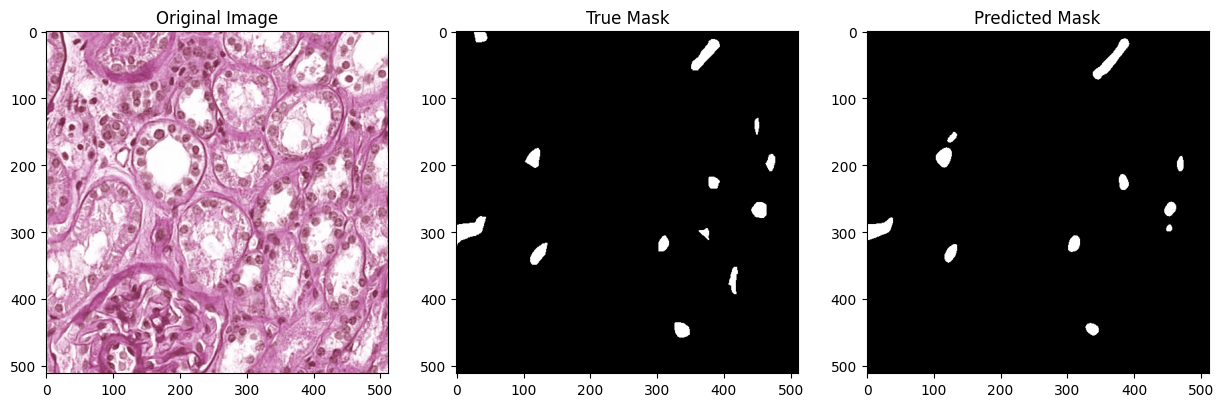

In [12]:
# Select a few test images
test_img_indices = [1, 3, 14]  # change these to select different images

for idx in test_img_indices:
    # Get the test image
    test_img = preprocessed_images[image_ids[idx]]

    # Get the predicted mask
    predicted_mask = predictions[idx].squeeze()  # remove extra dimensions

    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Plot the test image, its true mask, and its predicted mask
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(test_img)
    ax[0].title.set_text('Original Image')
    ax[1].imshow(true_mask, cmap='gray')
    ax[1].title.set_text('True Mask')
    ax[2].imshow(predicted_mask, cmap='gray')
    ax[2].title.set_text('Predicted Mask')
    plt.show()

In [26]:
def iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    union_sum = np.sum(union)
    if union_sum == 0:  # handle the case where there are no true or predicted positive samples
        return 1
    else:
        return np.sum(intersection) / union_sum

In [83]:
def calculate_metrics(y_true, y_pred):
    # Flatten the input arrays to compute metrics
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # If there are no true or predicted positive samples, return 0 for all metrics
    if np.sum(y_true_flat) == 0 and np.sum(y_pred_flat) == 0:
        return 0, 0, 1, 0, 1  # precision, recall, accuracy, f1, and iou are 0, 0, 1, 0, and 1 respectively

    # Compute precision, recall, accuracy, and F1 score
    precision = precision_score(y_true_flat, y_pred_flat)
    recall = recall_score(y_true_flat, y_pred_flat)
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    f1 = f1_score(y_true_flat, y_pred_flat)

    # Compute IoU score
    iou_score = iou(y_true, y_pred)

    return precision, recall, accuracy, f1, iou_score

In [20]:
print("Unique values in true mask:", np.unique(true_mask))
print("Unique values in predicted mask:", np.unique(predicted_mask))

Unique values in true mask: [  0 255]
Unique values in predicted mask: [0 1]


In [28]:
# Initialize accumulators
total_precision = 0
total_recall = 0
total_accuracy = 0
total_f1 = 0
total_iou = 0

# For each image
for idx in range(len(image_ids)):
    # Get the predicted mask
    predicted_mask = predictions[idx].squeeze()  # remove extra dimensions

    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Convert true mask to binary
    binary_true_mask = np.where(true_mask > 0, 1, 0)

    # Calculate and accumulate the metrics
    precision, recall, accuracy, f1, iou_score = calculate_metrics(binary_true_mask, predicted_mask)
    total_precision += precision
    total_recall += recall
    total_accuracy += accuracy
    total_f1 += f1
    total_iou += iou_score

# Calculate and print the average metrics
num_images = len(image_ids)
print(f'Average Precision: {total_precision / num_images}')
print(f'Average Recall: {total_recall / num_images}')
print(f'Average Accuracy: {total_accuracy / num_images}')
print(f'Average F1 Score: {total_f1 / num_images}')
print(f'Average IoU Score: {total_iou / num_images}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Average Precision: 0.759175354419903
Average Recall: 0.7150970036989699
Average Accuracy: 0.9825444238019007
Average F1 Score: 0.7213583258335824
Average IoU Score: 0.5938901398335277


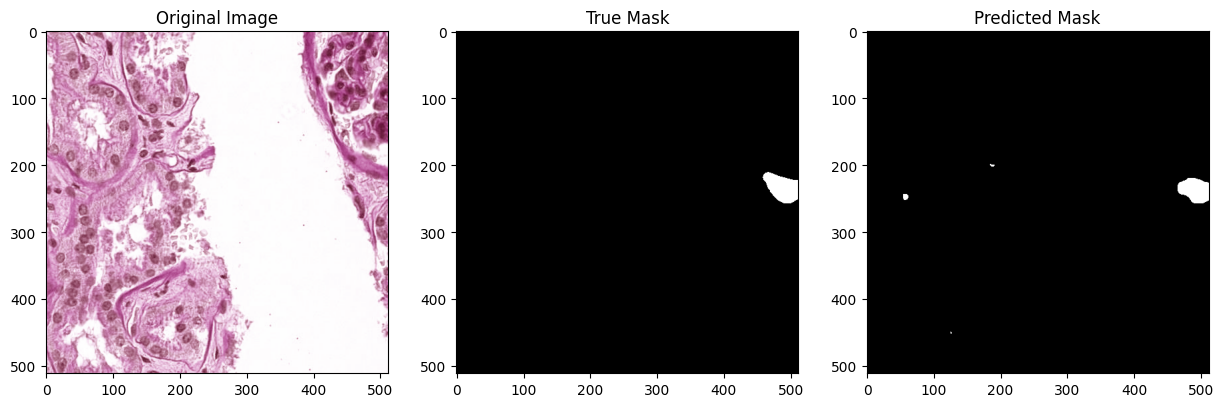

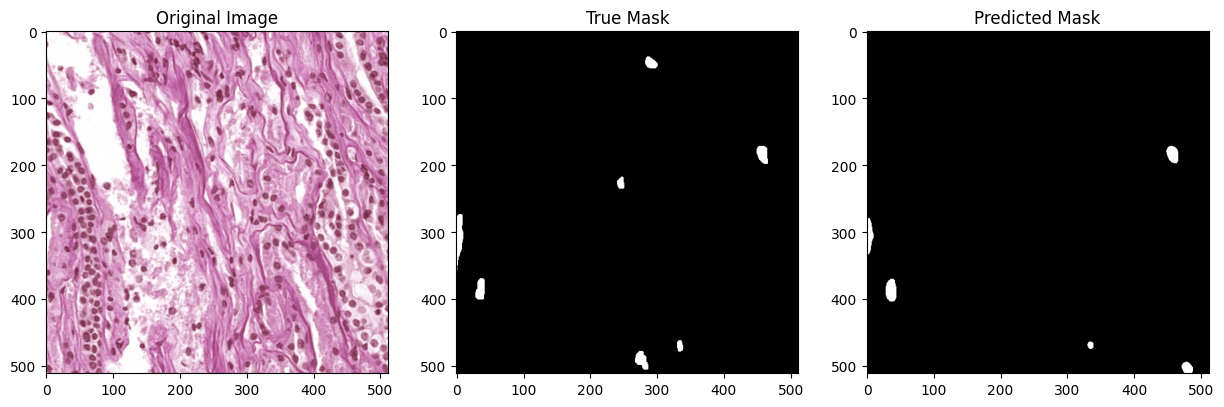

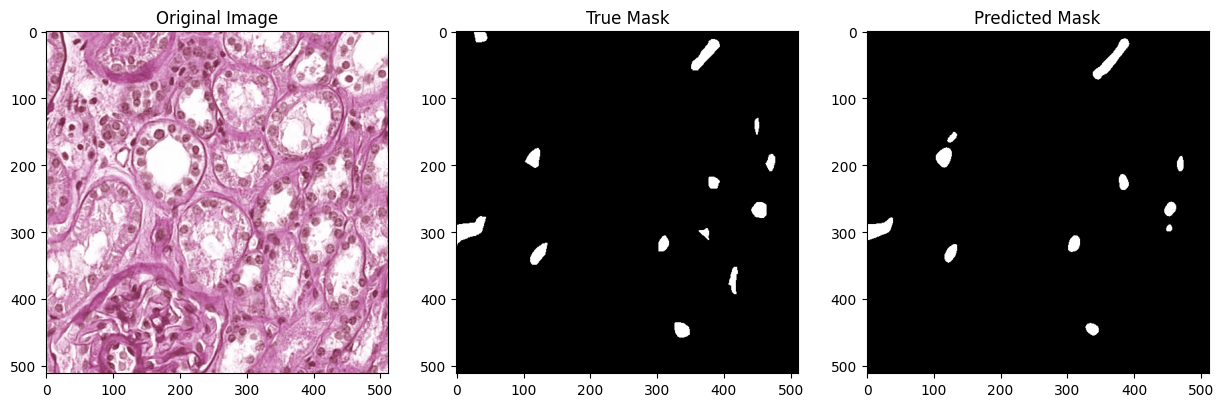

In [30]:
# Select a few test images
test_img_indices = [1, 3, 14]  # change these to select different images

for idx in test_img_indices:
    # Get the test image
    test_img = preprocessed_images[image_ids[idx]]

    # Get the predicted mask
    predicted_mask = predictions[idx].squeeze()  # remove extra dimensions

    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Plot the test image, its true mask, and its predicted mask
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(test_img)
    ax[0].title.set_text('Original Image')
    ax[1].imshow(true_mask, cmap='gray')
    ax[1].title.set_text('True Mask')
    ax[2].imshow(predicted_mask, cmap='gray')
    ax[2].title.set_text('Predicted Mask')
    plt.show()

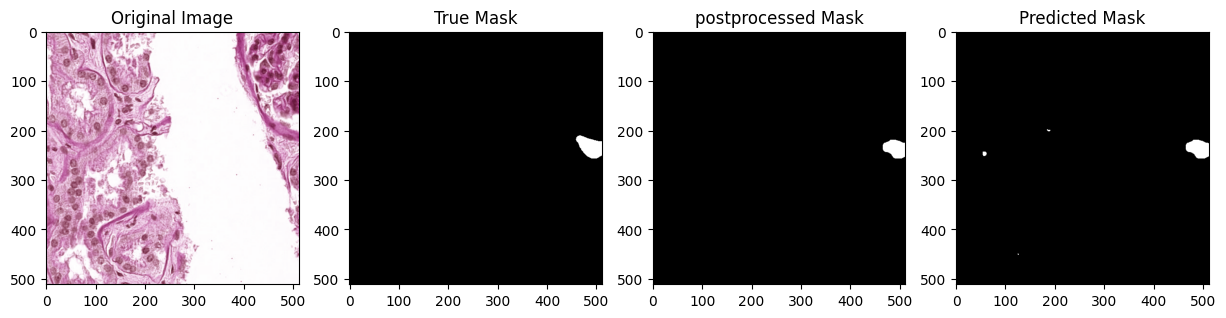

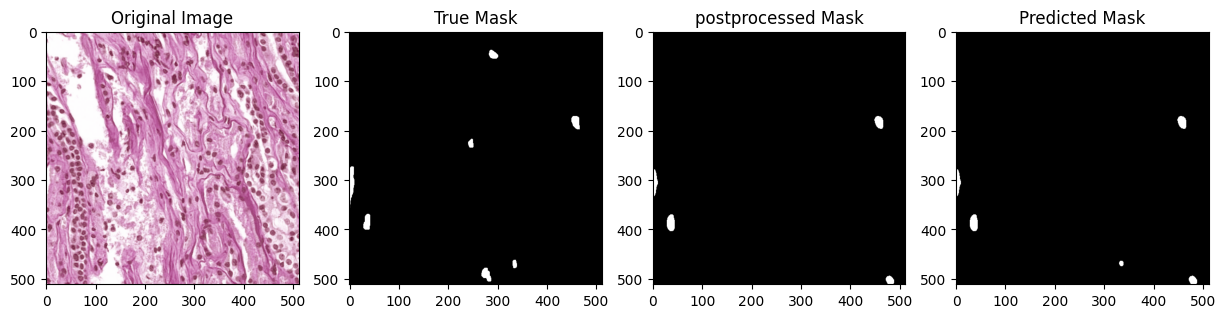

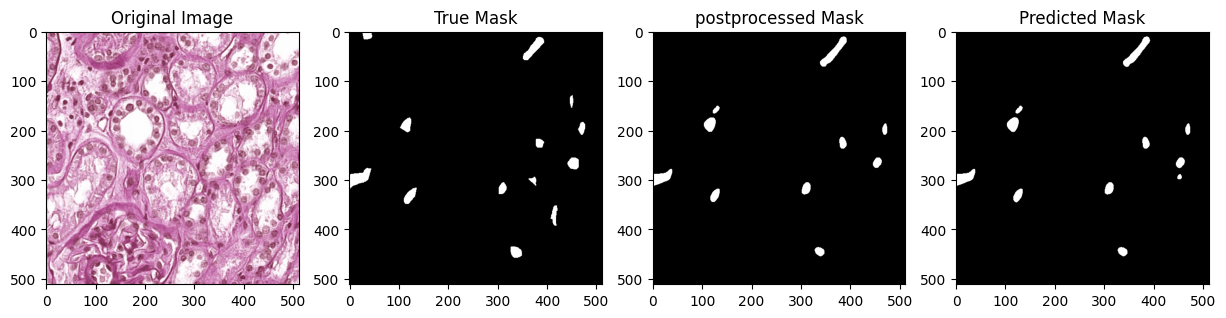

In [72]:
# Select a few test images
test_img_indices = [1, 3, 14]  # change these to select different images

for idx in test_img_indices:
    # Choose a size for the structure element that makes sense for your task
    selem = square(3)

    # Get the test image
    test_img = preprocessed_images[image_ids[idx]]

    # Get the predicted mask
    predicted_mask = predictions[idx].squeeze()  # remove extra dimensions
    # Perform opening on the predicted masks
    opened_masks = opening(predicted_mask, selem)
    # Assuming binary_pred_mask is your predicted mask
    labeled_array, num_features = ndimage.label(opened_masks)
    # Choose a minimum size for the objects that makes sense for your task
    min_size = 100
    # Create an empty mask to hold the remaining components
    final_mask = np.zeros_like(opened_masks)
    
    for i in range(1, num_features + 1):
      component_size = np.sum(labeled_array == i)
      if component_size >= min_size:
          final_mask += (labeled_array == i)
    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Plot the test image, its true mask, and its predicted mask
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(test_img)
    ax[0].title.set_text('Original Image')
    ax[1].imshow(true_mask, cmap='gray')
    ax[1].title.set_text('True Mask')
    ax[2].imshow(final_mask, cmap='gray')
    ax[2].title.set_text('postprocessed Mask')
    ax[3].imshow(predicted_mask, cmap='gray')
    ax[3].title.set_text('Predicted Mask')
    plt.show()





In [78]:
def process_mask(predicted_mask, selem_size=3, min_size=100):
    """
    Perform morphological operations and small object removal on the predicted mask.

    Args:
    predicted_mask (numpy.ndarray): The predicted mask.
    selem_size (int, optional): The size of the structure element for morphological operations. Default is 3.
    min_size (int, optional): The minimum size of the objects to be retained. Default is 100.

    Returns:
    final_mask (numpy.ndarray): The processed mask.
    """
    # Ensure that the input is a 2D array
    if len(predicted_mask.shape) > 2:
        predicted_mask = predicted_mask.squeeze()
    # Create structure element
    selem = square(selem_size)

    # Perform morphological operation (opening)
    opened_mask = opening(predicted_mask, selem)

    # Label connected components
    labeled_array, num_features = ndimage.label(opened_mask)

    # Create an empty mask to hold the remaining components
    final_mask = np.zeros_like(opened_mask)

    for i in range(1, num_features + 1):
        component_size = np.sum(labeled_array == i)
        if component_size >= min_size:
            final_mask += (labeled_array == i)

    return final_mask

In [79]:
# Assuming predictions is a list of your predicted masks
processed_predictions = [process_mask(pred) for pred in predictions]

In [84]:
# Initialize accumulators
total_precision_2 = 0
total_recall_2 = 0
total_accuracy_2 = 0
total_f1_2 = 0
total_iou_2 = 0

# For each image
for idx in range(len(image_ids)):
    # Get the predicted mask
    predicted_mask = processed_predictions[idx]  # remove extra dimensions

    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Convert true mask to binary
    binary_true_mask = np.where(true_mask > 0, 1, 0)

    # Calculate and accumulate the metrics
    precision, recall, accuracy, f1, iou_score = calculate_metrics(binary_true_mask, predicted_mask)
    total_precision_2 += precision
    total_recall_2 += recall
    total_accuracy_2 += accuracy
    total_f1_2 += f1
    total_iou_2 += iou_score

# Calculate and print the average metrics
num_images = len(image_ids)
print(f'Average Precision: {total_precision_2 / num_images}')
print(f'Average Recall: {total_recall_2 / num_images}')
print(f'Average Accuracy: {total_accuracy_2 / num_images}')
print(f'Average F1 Score: {total_f1_2 / num_images}')
print(f'Average IoU Score: {total_iou_2 / num_images}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and b

Average Precision: 0.7651327989083725
Average Recall: 0.710643549275962
Average Accuracy: 0.9826276756704307
Average F1 Score: 0.7212882065167073
Average IoU Score: 0.5941462001597103


Average Precision: 0.759175354419903

Average Recall: 0.7150970036989699

Average Accuracy: 0.9825444238019007

Average F1 Score: 0.7213583258335824

Average IoU Score: 0.5938901398335277

with post processing:

Average Precision: 0.7651327989083725

Average Recall: 0.710643549275962

Average Accuracy: 0.9826276756704307

Average F1 Score: 0.7212882065167073

Average IoU Score: 0.5941462001597103